<style>
    h1 {
    font-family: 'Segoe UI Semibold';
    font-size: 35px;
    text-align: center;
  }
</style>

# Taller Análitica: Productividad en Manufactura

<style>
  .image {
            overflow: hidden;
            width: 100%;
            border-radius: 20px;
            object-fit: cover;
        }
  .container {
            width: 100%;
            height: auto;
        }
 
</style>
<div class="container">
    <img src= "img\production-line2.png" class="image"/>
</div>

<style>
  p {
    font-family: 'Segoe UI Light';
    font-size: 20px;
    text-align: center;
  }
</style>

<div style="text-align: center;">
  Analítica de Datos <br>
  Universidad de los Andes & Instituto Tecnólogico de Monterrey &copy; 2024 <br>
  11 de octubre de 2024 <br><br>
  <strong>GRUPO 7:</strong> <br>
  Camilo Duque - 202024289 (uniandes)<br>
  Daniela Espinosa - 202022615 (uniandes)<br>
  Emilio Fernández - (TEC)<br>
</div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as pyplot

#Tarea 1
Determine la pregunta (o preguntas) de negocio que quiere resolver para su cliente
seleccionado. Identifique como puede resolver estas preguntas a traves de visualizaciones
de los datos (descriptivo) y un modelo predictivo (idealmente de regresion, pero tambien
puede ser de clasificacion).


#Tarea 2
Cargue los datos en python, explore los datos disponibles y realice una limpieza cuidadosa. Identifique datos faltantes, inconsistencias, datos duplicados y decida una estrategia
para su gestion. Asegurese de que los datos queden en un formato que permita su posterior
analisis. Documente los procedimientos realizados.


In [3]:
data = pd.read_csv('productividad.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   object 
dtypes: f

In [5]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,01/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.8865
2,01/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,01/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,01/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


In [6]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


1. Verificar cuantos datos faltantes hay por cada variable.

In [7]:
empty_rows_per_column = data.isnull().sum()
empty_rows_per_column

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


Aqui se puede ver que la unica variable que tiene datos faltantes es la de wip (trabajo en progreso), por lo que haremos un histograma para ver la distribucion d edicha variable y mas adelante decidir coomo poder rellenar dichos datos faltantes.

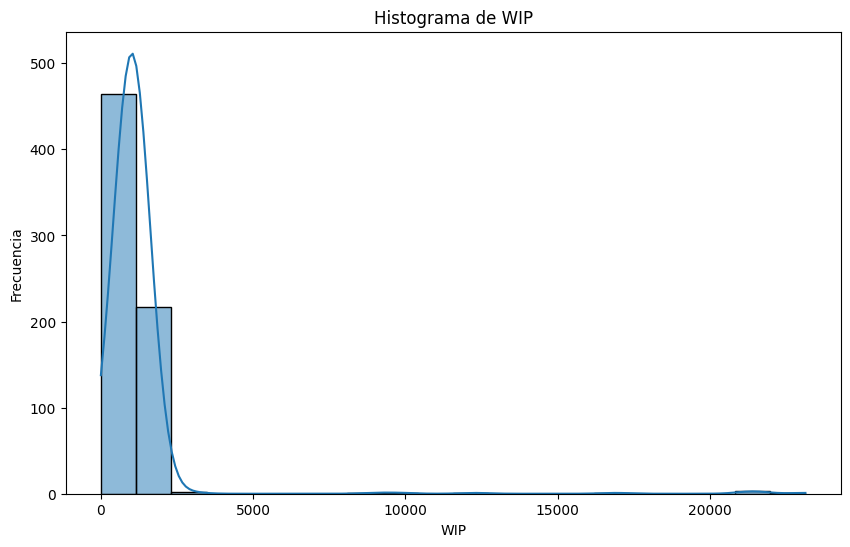

In [8]:
# prompt: Creame un histograma de la variable wip en data

plt.figure(figsize=(10, 6))
sns.histplot(data['wip'], bins=20, kde=True)
plt.title('Histograma de WIP')
plt.xlabel('WIP')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable "wip" muestra una distribución sesgada hacia la derecha, con muchos valores concentrados cerca de cero y algunos valores extremos (outliers) que están muy alejados del resto de los datos. Primero crearemos una tabla de correlaciones para ver como se comportan las otras variables conforme a wip.

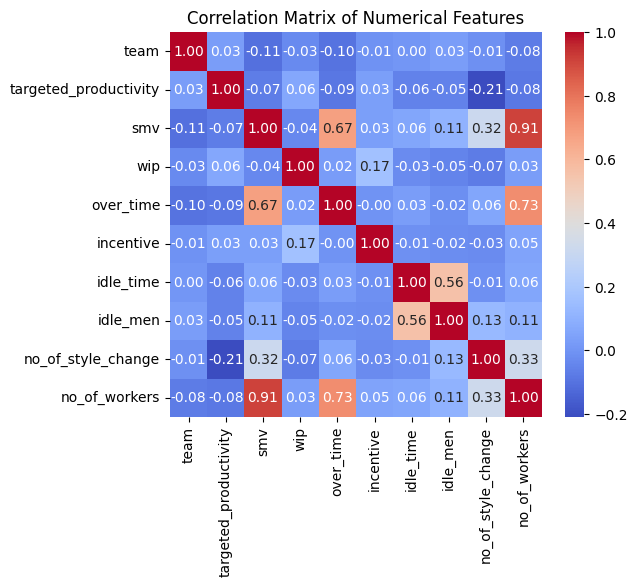

In [13]:
# Extract numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Las variables numéricas más correlacionadas con "wip" son las siguientes:

*   incentive (0.17): Tiene una correlación positiva moderada.
*   actual_productivity (0.11): Correlación positiva ligera.
*   targeted_productivity (0.06): Correlación positiva baja.
*   no_of_workers (0.03): Correlación positiva baja.
*   over_time (0.02): Correlación positiva mínima.

Podemos observar que la correlacion es muy baja y por lo tanto un modelo de regresion lineal multiple no seria muy adecuado. Por lo tanto, optaremos por utilizar la mediana, que es una medida de tendencia central la cual no se ve afectada por los outliers y que podría funcionar muy bien con estos datos faltantes.

In [14]:
wip_median = data['wip'].median()

data['wip'].fillna(wip_median, inplace=True)

empty_rows_per_column = data.isnull().sum()
empty_rows_per_column

<ipython-input-14-0013815803f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['wip'].fillna(wip_median, inplace=True)


,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


Avanzando un poco hacia las inconsistencias, analizamos que la variable de no_of_workers (numero de trabajadores por equipo) tiene valores decimales, llegando a tener valores con .5, lo cual no es posible ya que estamos hablando de personas y no puede haber media persona, deben de ser enteros, por eso redondearemos dichos valores a su entero mas cercano.

In [15]:
data['no_of_workers'] = round(data['no_of_workers'])

data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.8865
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570492
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.0,0.800570492
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


Tambien encontramos que la variable de productividad real esta en formato de object, lo cual es incorrecto ya que deberia de ser un formato de decimales, por lo cual haremos ese cambio.

In [18]:
data['actual_productivity'] = pd.to_numeric(data['actual_productivity'], errors='coerce')

data['actual_productivity'].fillna(0, inplace=True)


<ipython-input-18-199600f7cd82>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['actual_productivity'].fillna(0, inplace=True)


Tambien ya se reviso y no se encontraron valores negativos en las columnas donde no deberían existir (como SMV, WIP, tiempo extra, incentivos, etc.).

Conforme a datos duplicados solo encontramos que hay varias entradas duplicadas en cuanto a la combinación de fecha y equipo. Esto podría ser un error si no deberían existir múltiples registros por equipo en el mismo día, pero al no saber con exactitud como maneja este aspecto la empresa con la que trabajamos, ignoraremos o aceptaremos que hayan dichos datos duplicados ya que asumimos que un solo equipo puede tener varios trabajos en un solo día.

# Tarea 3
Realice un analisis exploratorio que permita describir estadıstica y visualmente el
comportamiento de las variables a considerar. Calcule estadısticas descriptivas, realice
histogramas, diagramas de caja, diagramas de dispersion, diagramas de violın y otros que
permitan comprender como se comportan las variables. Documente el analisis realizado.


# Tarea 4
Aquı debera explorar los diferentes modelos y diferentes configuraciones de los mismos,
realizar ingenierıa de caracterısticas (variables), emplear diferentes metodos de estimacion,
comparar y seleccionar las mejores alternativas, considerando diferentes metricas. Consulte bibliografıa que le permita contar con elementos para proponer los modelos. No es
necesario emplear todas las variables disponibles, pero todas las variables incluidas y sus
relaciones deben estar correctamente justificadas. Como hay un buen numero de variables,
se espera que el modelo desarrollado por cada equipo sea unico. Evalue su modelo usando
metricas apropiadas. Documente el modelamiento realizado.
